In [2]:
import matplotlib
from pathlib import Path
import mne
import mne_bids
import PyQt5

In [3]:
# Read BIDS Data
bids_root = Path('eeg_matchingpennies')
bids_path = mne_bids.BIDSPath(subject='05',
                              task='matchingpennies',
                              datatype='eeg',
                              root=bids_root)
raw = mne_bids.read_raw_bids(bids_path)

Extracting parameters from eeg_matchingpennies/sub-05/eeg/sub-05_task-matchingpennies_eeg.vhdr...
Setting channel info structure...
Reading events from eeg_matchingpennies/sub-05/eeg/sub-05_task-matchingpennies_events.tsv.
Reading channel info from eeg_matchingpennies/sub-05/eeg/sub-05_task-matchingpennies_channels.tsv.
/home/ubuntu/.local/lib/python3.8/site-packages/mne_bids/path.py:1065: RuntimeWarning: Did not find any coordsystem.json associated with sub-05_task-matchingpennies.

The search_str was "eeg_matchingpennies/sub-05/**/sub-05*coordsystem.json"
  warn(msg)
/home/ubuntu/.local/lib/python3.8/site-packages/mne_bids/path.py:1065: RuntimeWarning: Did not find any eeg.json associated with sub-05_task-matchingpennies.

The search_str was "eeg_matchingpennies/sub-05/**/sub-05*eeg.json"
  warn(msg)


['FC5', 'FC6']


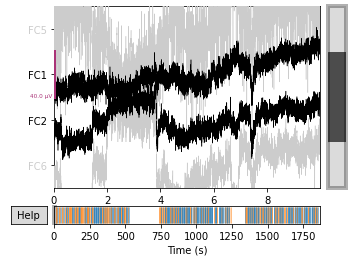

Reading 0 ... 9348356  =      0.000 ...  1869.671 secs...


<RawBrainVision | sub-05_task-matchingpennies_eeg.eeg, 10 x 9348357 (1869.7 s), ~713.2 MB, data loaded>

In [4]:
bad_channels = raw.info['bads']
print(bad_channels)
picks = mne.pick_channels_regexp(raw.ch_names, regexp='FC.')
raw.plot(order=picks, n_channels=len(picks))
raw.load_data()


In [6]:
# Having mne read the digitization 
raw.rename_channels({'E129': 'Cz'})
ten_twenty_montage = mne.channels.make_standard_montage('GSN-HydroCel-129')
raw_1020 = raw.copy().set_montage(ten_twenty_montage)
raw_1020_copy = raw_1020.copy().pick_types(meg=False,eeg=True,exclude=[])

ValueError: Invalid value for the 'kind' parameter. Allowed values are 'EGI_256', 'GSN-HydroCel-128', 'GSN-HydroCel-129', 'GSN-HydroCel-256', 'GSN-HydroCel-257', 'GSN-HydroCel-32', 'GSN-HydroCel-64_1.0', 'GSN-HydroCel-65_1.0', 'biosemi128', 'biosemi16', 'biosemi160', 'biosemi256', 'biosemi32', 'biosemi64', 'easycap-M1', 'easycap-M10', 'mgh60', 'mgh70', 'standard_1005', 'standard_1020', 'standard_alphabetic', 'standard_postfixed', 'standard_prefixed', and 'standard_primed', but got 'GSN-129' instead.

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


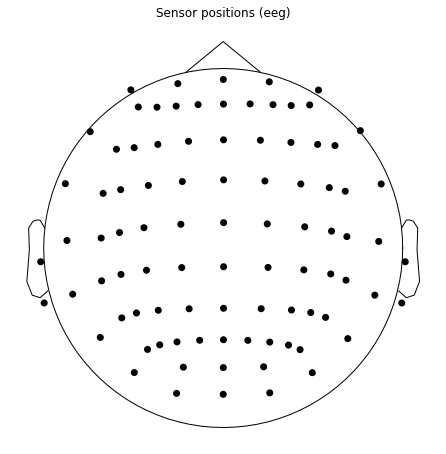

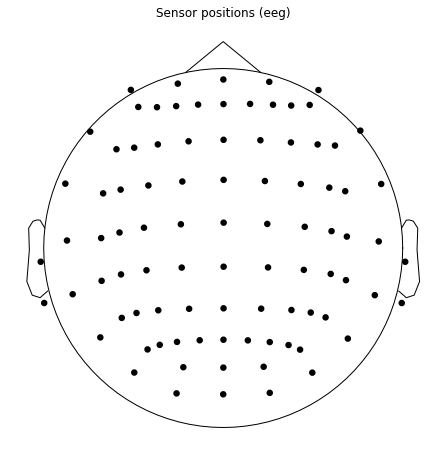

In [7]:
# Plotting the montage 

ten_twenty_montage.plot(kind='topomap', show_names=False)

In [8]:
# Interpolate our data 
raw_interp = raw_1020_copy.copy().interpolate_bads(reset_bads=False)


Interpolating bad channels
    Automatic origin fit: head of radius 83.6 mm
Computing interpolation matrix from 8 sensor positions
Interpolating 2 sensors
<ipython-input-8-6082cfd7725c>:2: RuntimeWarning: Only 10 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  raw_interp = raw_1020_copy.copy().interpolate_bads(reset_bads=False)


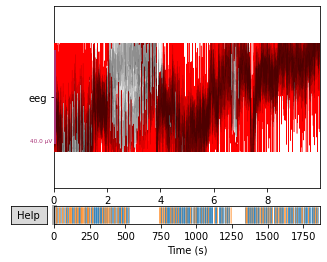

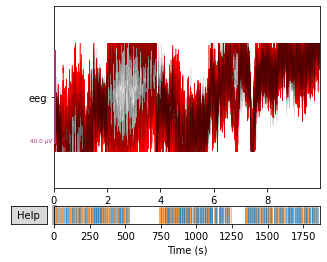

In [9]:
# Plot the difference of original data and interpolated date 
for title, data in zip(['orig.', 'interp.'], [raw_1020_copy, raw_interp]):
    fig = data.plot(butterfly=True, color='#00000022', bad_color='r')
    fig.subplots_adjust(top=0.9)
    fig.suptitle(title, size='xx-large', weight='bold')